In [29]:
import os
from multiprocessing import cpu_count
import string, re, time
import spacy
import dask.dataframe as dd
from nltk.stem import snowball
import pandas as pd
import graphviz
from dask.distributed import Client, progress
from dask import delayed, compute

client = Client(set_as_default=False)

In [30]:
client

Client Scheduler: tcp://127.0.0.1:46187 Dashboard: http://127.0.0.1:38451/status,Cluster Workers: 4 Cores: 4 Memory: 8.09 GB


In [31]:
meta = {'title':'U','section':'U','text':'U','url':'U'}

In [32]:
data_directory = os.path.join('..','data')

In [33]:
stemmer = snowball.EnglishStemmer()

In [34]:
regex = re.compile('[%s]' % re.escape(string.punctuation+string.digits+'“”\''))

In [35]:
df = dd.read_csv(os.path.join(data_directory,'sens-copy.csv'))

In [36]:
df.text = df.text.sample(frac=0.5)

In [37]:
df.text = df.text.astype('U')

In [38]:
df.text = df.text.str.normalize('NFC')

In [39]:
df.text = df.text.str.lower()

In [40]:
df.text = df.text.str.replace(regex, ' ')

In [41]:
df.text = df.text.apply(lambda x: stemmer.stem(x), meta='U')

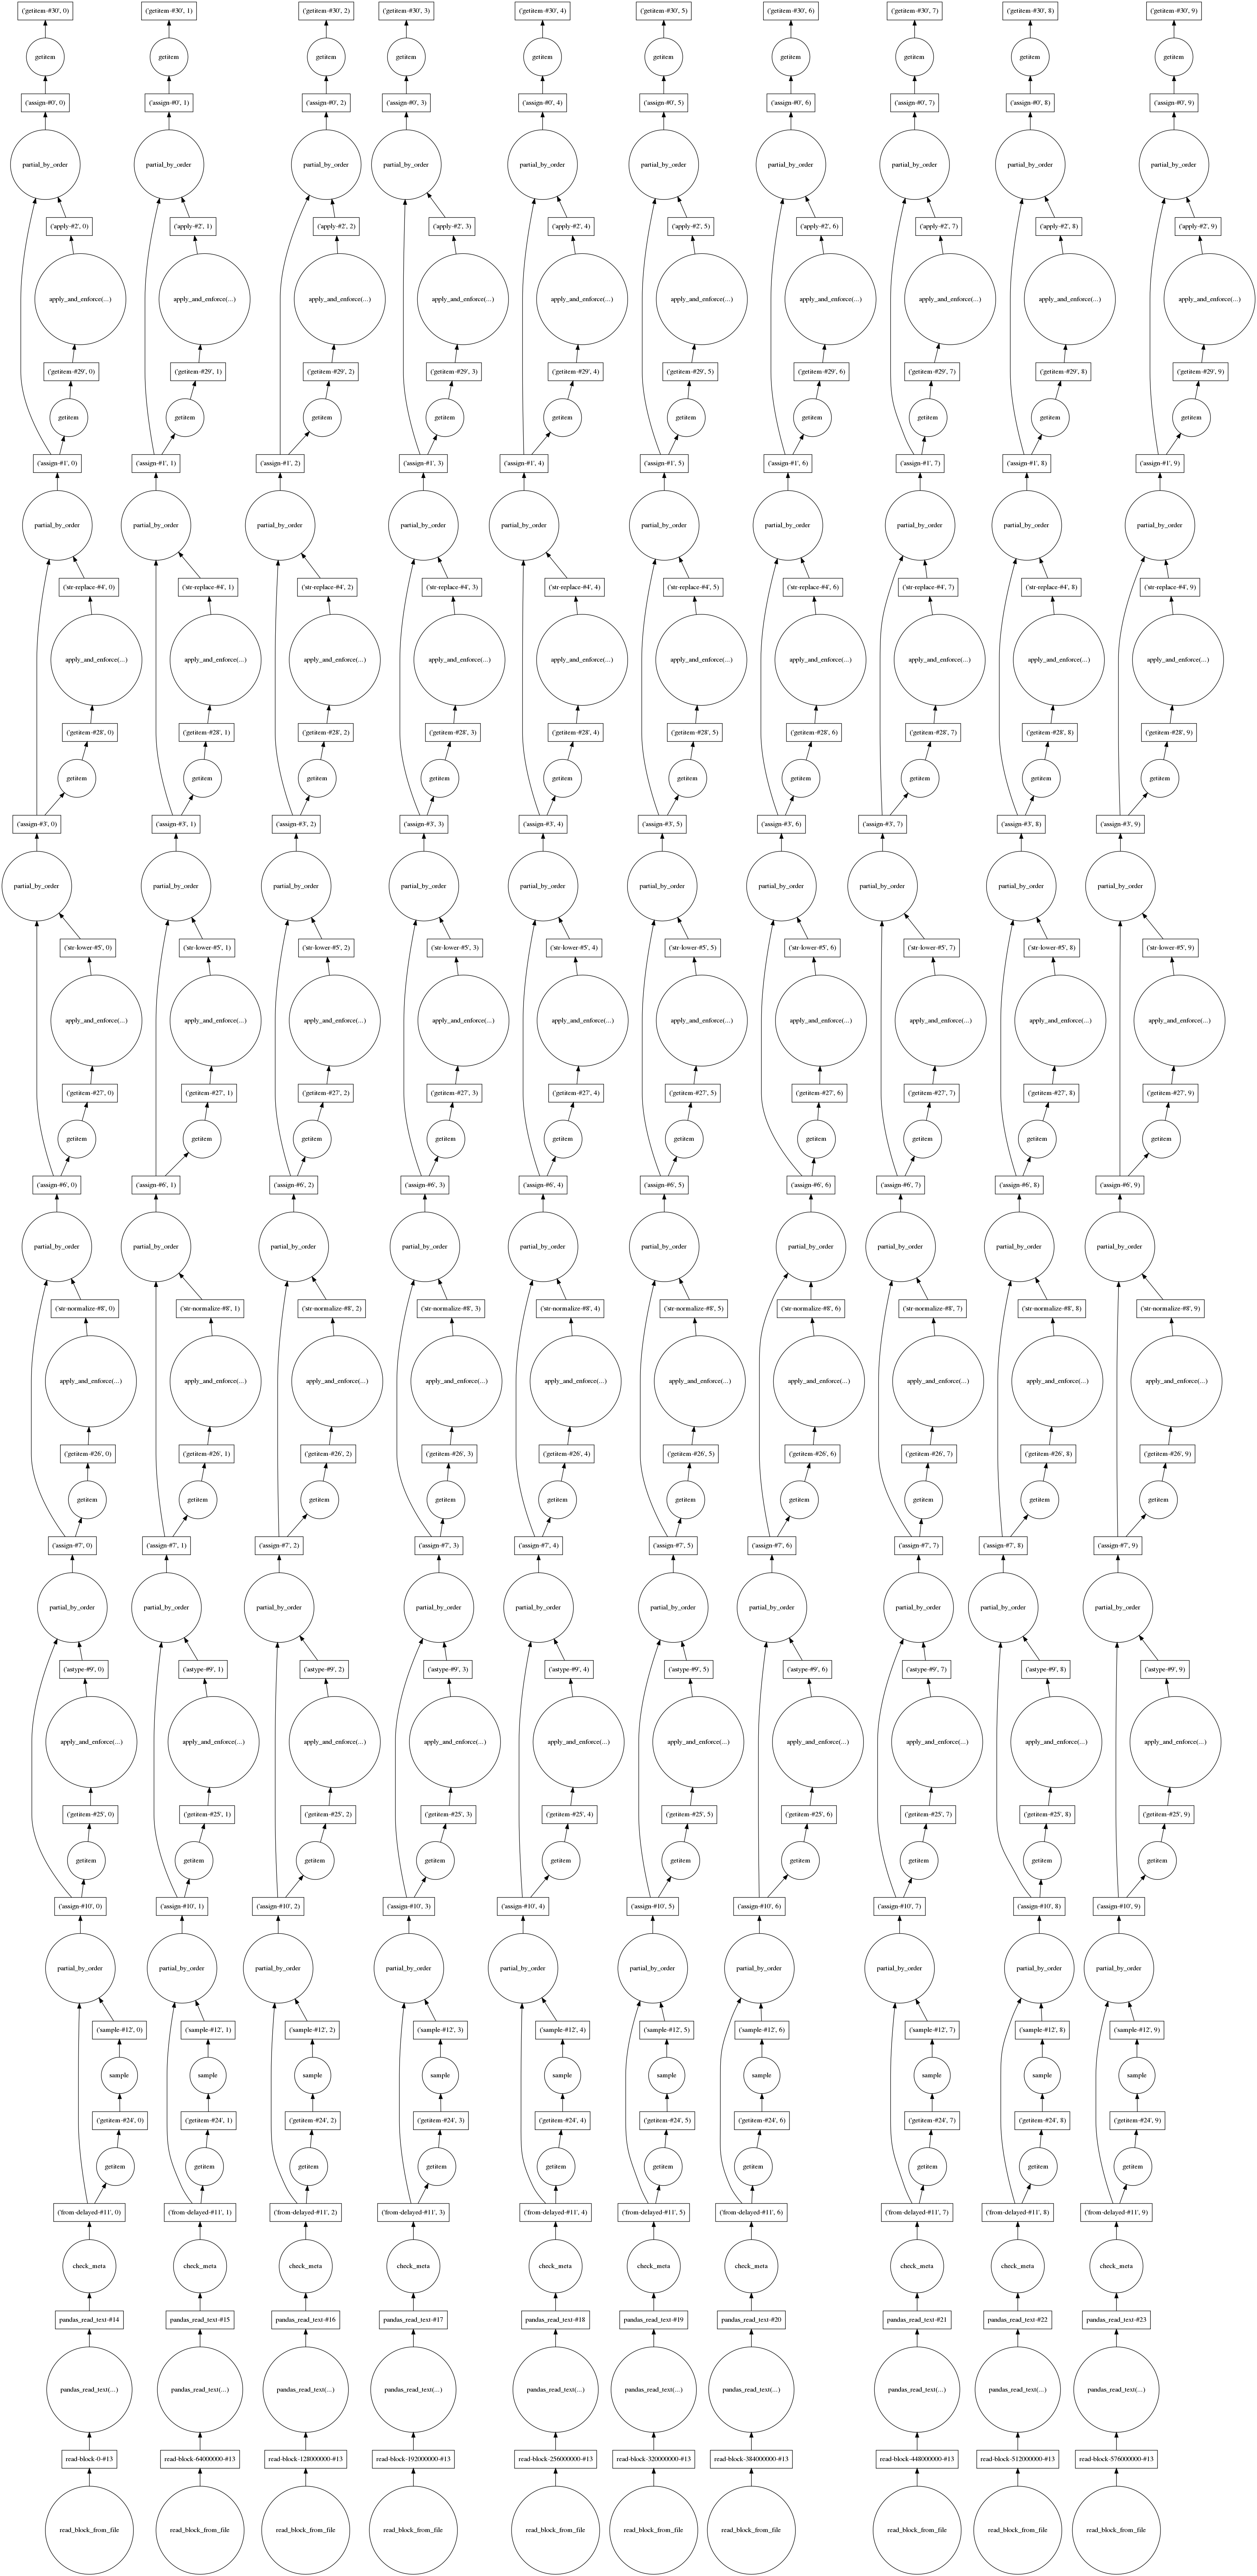

In [42]:
from dask.dot import dot_graph
dot_graph(df.text.dask)

In [43]:
df.text.compute()

0                                                     nan
1       psg group limited incorporated in the republic...
2                                                     nan
3       old mutual plc isin code  gb  b  j     jse sha...
4                                                     nan
5                                                     nan
6                                                     nan
7                                                     nan
8       old mutual plc isin code  gb  b  j     jse sha...
9                                                     nan
10                                                    nan
11      csg holdings limited  incorporated in the repu...
12      satrix collective investment scheme satrix pro...
13      old mutual plc isin code  gb  b  j     jse sha...
14                                                    nan
15      old mutual plc isin code  gb  b  j     jse sha...
16      intu properties plc   intu    registration num...
17            

In [7]:
#pr = dd.read_csv(os.path.join(data_directory,'JSE_RI_2003_2008.csv'), sep=';')

In [8]:
#pr = pr.loc[1:,:]

In [9]:
#pr.loc[:,1:175] = pr.loc[:,1:175].apply(lambda x: x.str.replace(",",".").astype(float), axis=0)

In [10]:
#pr.iloc[:,1:175] = (pr.iloc[:,1:175] - pr.iloc[:,1:175].shift(1))/pr.iloc[:,1:175]

In [12]:
#ents = pr.columns.str.extract('^(.+?)-')[0].str.replace(regex, ' ').str.replace('JSE', ' ').str.replace('GROUP', ' ').str.replace(' +', ' ').dropna()

In [17]:
#df.ents = df.text.str.count('Naspers', flags=re.IGNORECASE)  > 5

In [18]:
#df.date = pd.to_datetime(df.date).astype('<M8[D]')

In [19]:
#df = df.loc[df.ents,:]

In [20]:
#pr.date= pd.to_datetime(pr.Name).astype('<M8[D]')

In [21]:
#pr.Name = pr.date

In [22]:
#data = pd.merge(pr.iloc[1:,[0,1]], df, how='inner', left_on=['Name'], right_on=['date'])

In [23]:
"""

import dask_ml.joblib
from sklearn.externals.joblib import parallel_backend

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_df=0.8, min_df=0.5)

with parallel_backend('dask'):
    text = vectorizer.fit_transform(df.text)
    
"""

"\n\nfrom dask.distributed import Client\nclient = Client()  # start a local Dask client\n\nimport dask_ml.joblib\nfrom sklearn.externals.joblib import parallel_backend\n\nfrom sklearn.feature_extraction.text import CountVectorizer\nvectorizer = CountVectorizer(stop_words='english', max_df=0.8, min_df=0.5)\n\nwith parallel_backend('dask'):\n    text = vectorizer.fit_transform(df.text)\n    \n"

In [76]:
data.predict = data['NASPERS - TOT RETURN IND'] >= 0

/home/marcussky/anaconda3/envs/pearl/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(text.todense(), data.predict, test_size = 0.8)

In [91]:
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [92]:
nb.score(X_test, y_test)

0.46835443037974683

In [94]:
y_train.mean()

0.36842105263157893

In [95]:
data.shape

(98, 7)

In [10]:
#nlp = spacy.load('en', disable=['parser', 'tagger'])

In [11]:
#df.entities = df.text.astype('U').apply(lambda x: nlp(x).ents, meta='U').compute()

In [12]:
#df.entities.compute()